In [40]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from itertools import combinations 
from sklearn import model_selection
import copy 
from statistics import mean,mode 
from itertools import combinations  
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

fig = plt.figure()
#fig.suptitle('4_class', fontsize=20)
#plt.boxplot(csv_list_4_class,labels=label)#
#plt.figure(figsize=(5,15))
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:", fig_size)
fig_size[0] = 17
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

Current size: [17.0, 10.0]


<Figure size 1224x720 with 0 Axes>

In [41]:
df=pd.read_csv('60s_window_wrist_chest.csv',index_col=0)

features=df.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)

features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

sm = SMOTE(random_state=2)
X, y= sm.fit_sample(df[features_with_sub], df['label'])
df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

for i in range (len(list(df_new['subject']))):
    df_new['subject'][i] = min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-df_new['subject'][i]))
df_new['subject']=df_new['subject'].astype(int)

p_d=pd.read_csv('personal_detail.csv',index_col=0)

df_new_1=df_new.merge(p_d,on='subject')
# df_new_1

sel_fea = ['EDA_tonic_mean','EDA_smna_mean','EDA_tonic_min','EDA_phasic_mean','TEMP_std','BVP_peak_freq','smoker_YES','ACC_y_min','ACC_x_mean','weight','gender_ female','c_Temp_max','ACC_x_max','TEMP_mean',
          'c_ACC_y_std','net_acc_max','Resp_std']

70


/home/sf/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [42]:
df_new_1

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,label,age,height,weight,gender_ female,coffee_today_YES,sport_today_YES,smoker_YES,feel_ill_today_YES,bmi
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,0,27,175,80,0,0,0,0,0,1
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,0,27,175,80,0,0,0,0,0,1
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,0,27,175,80,0,0,0,0,0,1
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,0,27,175,80,0,0,0,0,0,1
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,0,27,175,80,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.029484,0.002074,0.020918,0.053804,-0.004624,0.002074,-0.015439,0.017447,-0.000003,1.427082e-06,...,1,29,165,55,1,0,0,0,0,0
1244,0.032744,0.000516,0.029211,0.034857,-0.029334,0.000516,-0.031478,-0.025832,-0.000020,3.552867e-07,...,2,29,165,55,1,0,0,0,0,0
1245,0.030006,0.007051,0.002966,0.070357,-0.027424,0.007051,-0.067796,-0.000404,-0.000019,4.851210e-06,...,2,29,165,55,1,0,0,0,0,0
1246,0.031250,0.001534,0.027188,0.038575,-0.031250,0.001534,-0.038575,-0.027188,-0.000022,1.055452e-06,...,2,29,165,55,1,0,0,0,0,0


In [43]:
subject = df_new_1[['subject']]
copy = df_new_1.drop(['subject','label'],axis=1)

In [44]:
copy
scaler = Normalizer()
copy = scaler.fit_transform(copy[sel_fea])

In [45]:
pca = PCA(n_components=3)
# pca.fit(copy)
principalComponents = pca.fit_transform(copy)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

print(pca.explained_variance_ratio_)

[0.81792466 0.07378749 0.0595467 ]


In [46]:
principalDf['subject']=subject['subject']
principalDf

,principal component 1,principal component 2,principal component 3,subject
0,-0.057689,-0.025326,-0.006722,2
1,-0.061902,-0.030691,-0.034110,2
2,-0.062879,-0.035630,-0.023686,2
3,-0.061862,-0.035152,-0.017170,2
4,-0.063665,-0.038905,-0.021141,2
...,...,...,...,...
1243,0.126436,0.004934,-0.001544,17
1244,0.130452,-0.017553,-0.005050,17
1245,0.129283,-0.024029,-0.006551,17
1246,0.128801,-0.015287,-0.003731,17


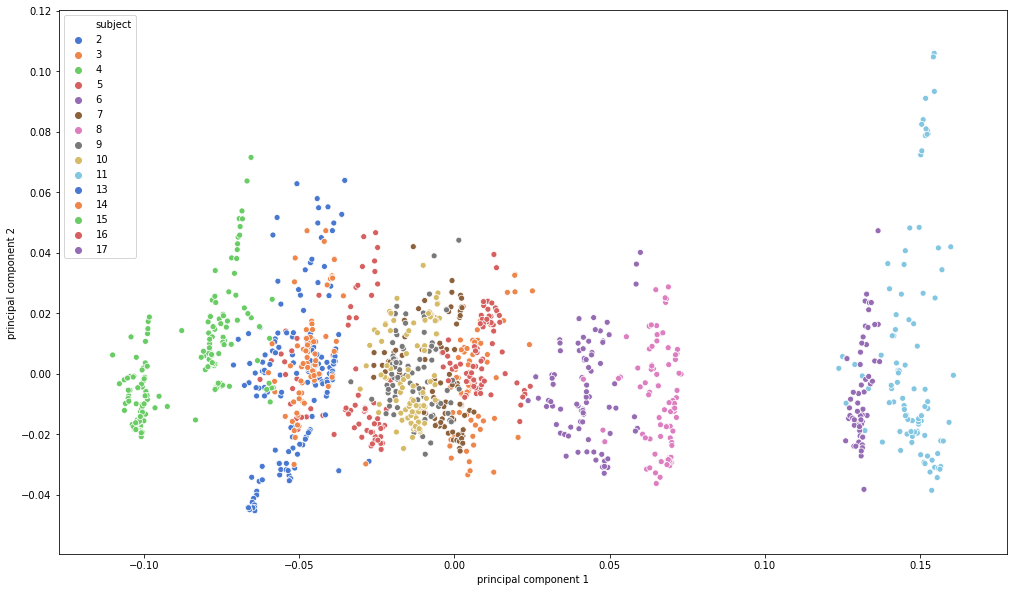

In [89]:
import seaborn
#"#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99","#b15928",
#flatui = ["#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99","#b15928","#9b59b6", "#3498db", "#95a5a6"]
#cmap=seaborn.set_palette(flatui,15)
cmap = seaborn.color_palette("muted", 15)
seaborn.scatterplot(x='principal component 1', y='principal component 2', hue='subject', data=principalDf,
                     palette=cmap,)

In [93]:
group = []
for _ in  principalDf['subject']:
    if _ in [3,11,17]:
        group.append(1)
    else:
        group.append(0)
        
groupdf = pd.DataFrame(group)
principalDf['group'] = groupdf[0]


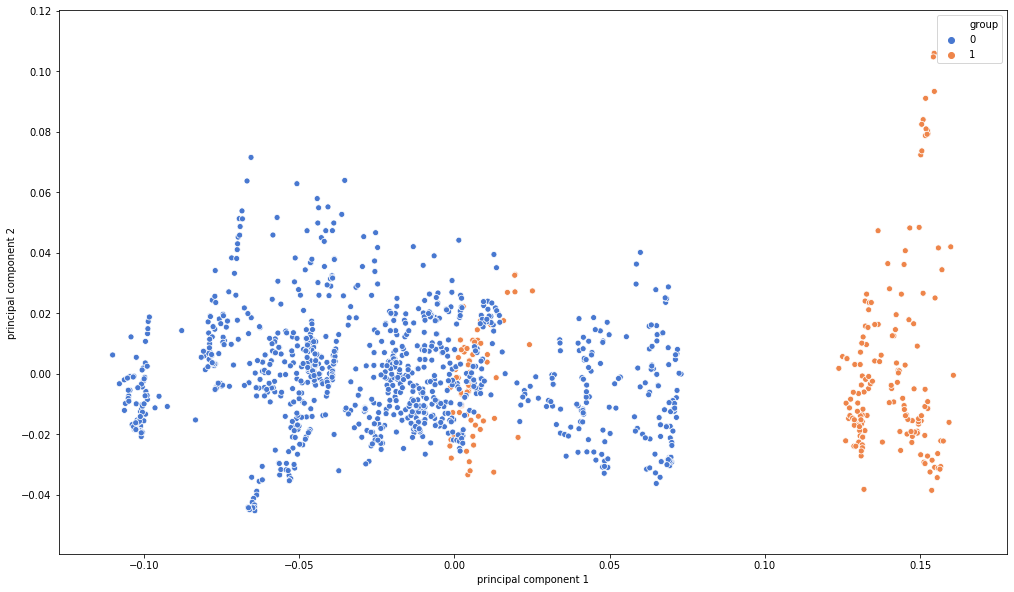

In [95]:
import seaborn
#"#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99","#b15928",
#flatui = ["#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99","#b15928","#9b59b6", "#3498db", "#95a5a6"]
#cmap=seaborn.set_palette(flatui,15)
cmap = seaborn.color_palette("muted", 2)
seaborn.scatterplot(x='principal component 1', y='principal component 2', hue='group', data=principalDf,
                     palette=cmap,)

# HACKED VERSiON

In [73]:
a = principalDf[principalDf['subject'].isin( [3,4,11,17]) ]

# c = a.values.tolist()
c = principalDf.values.tolist()


for _ in c:
    if _[3] == 3:
        print (_[0])
        _[0] += 0.14
        print (_[0])
        

0.017070536645840906
0.15707053664584092
0.00627047166402837
0.14627047166402837
0.00563685660922818
0.1456368566092282
0.004688139704157371
0.1446881397041574
-8.902169193802726e-05
0.13991097830806198
-0.0011187476069112786
0.13888125239308874
-0.0005224081461133347
0.13947759185388667
-0.0013975602441971403
0.1386024397558029
-0.0014597874096061766
0.13854021259039384
-0.0010074813845359991
0.13899251861546402
0.003914391245269228
0.14391439124526925
0.003899295577776112
0.14389929557777612
0.007711358234023588
0.1477113582340236
0.0059373550247497015
0.14593735502474972
0.00478028654215924
0.14478028654215924
0.006762184407066127
0.14676218440706615
0.00431776564146495
0.14431776564146495
0.006177802552691668
0.1461778025526917
0.005045070483968756
0.14504507048396878
0.008327274632679075
0.14832727463267908
0.011704772309549583
0.1517047723095496
0.010548353662356187
0.1505483536623562
0.02416654519713837
0.16416654519713839
0.02512153374528964
0.16512153374528965
0.01950230834217

In [74]:
c = pd.DataFrame(c) 
c.columns = ['principal component 1', 'principal component 2','principal component 3','subject']
a

,principal component 1,principal component 2,principal component 3,subject
60,0.017071,0.026841,-0.027668,3
61,0.006270,-0.003972,-0.041218,3
62,0.005637,-0.003120,-0.031941,3
63,0.004688,-0.004917,-0.024634,3
64,-0.000089,-0.020720,-0.023541,3
...,...,...,...,...
1243,0.126436,0.004934,-0.001544,17
1244,0.130452,-0.017553,-0.005050,17
1245,0.129283,-0.024029,-0.006551,17
1246,0.128801,-0.015287,-0.003731,17


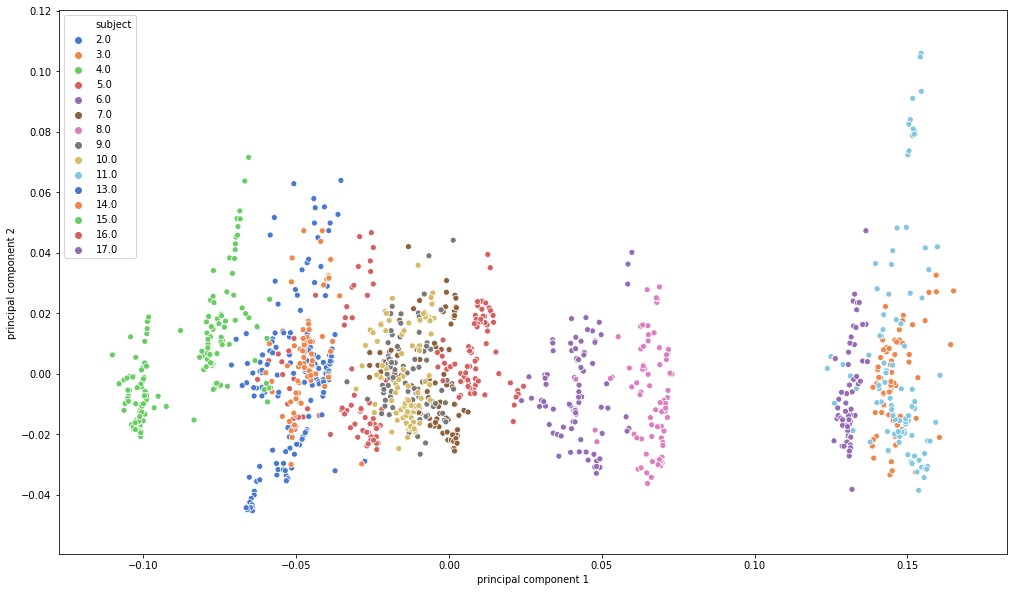

In [76]:
import seaborn
#"#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99","#b15928",
#flatui = ["#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99","#b15928","#9b59b6", "#3498db", "#95a5a6"]
#cmap=seaborn.set_palette(flatui,15)
cmap = seaborn.color_palette("muted", 15)
seaborn.scatterplot(x='principal component 1', y='principal component 2', hue='subject', data=c,
                     palette=cmap,)

In [81]:
group = [1 if _ in [3,11,17] for _ in c['subject'] else 0]

SyntaxError: invalid syntax (<ipython-input-81-388d1c548b3a>, line 1)

In [83]:
group = []
for _ in  c['subject']:
    if _ in [3,11,17]:
        group.append(1)
    else:
        group.append(0)

In [85]:
groupdf = pd.DataFrame(group)
groupdf

,0
0,0
1,0
2,0
3,0
4,0
...,...
1243,1
1244,1
1245,1
1246,1


In [87]:
c['group'] = groupdf[0]
c

,principal component 1,principal component 2,principal component 3,subject,group
0,-0.057689,-0.025326,-0.006722,2.0,0
1,-0.061902,-0.030691,-0.034110,2.0,0
2,-0.062879,-0.035630,-0.023686,2.0,0
3,-0.061862,-0.035152,-0.017170,2.0,0
4,-0.063665,-0.038905,-0.021141,2.0,0
...,...,...,...,...,...
1243,0.126436,0.004934,-0.001544,17.0,1
1244,0.130452,-0.017553,-0.005050,17.0,1
1245,0.129283,-0.024029,-0.006551,17.0,1
1246,0.128801,-0.015287,-0.003731,17.0,1


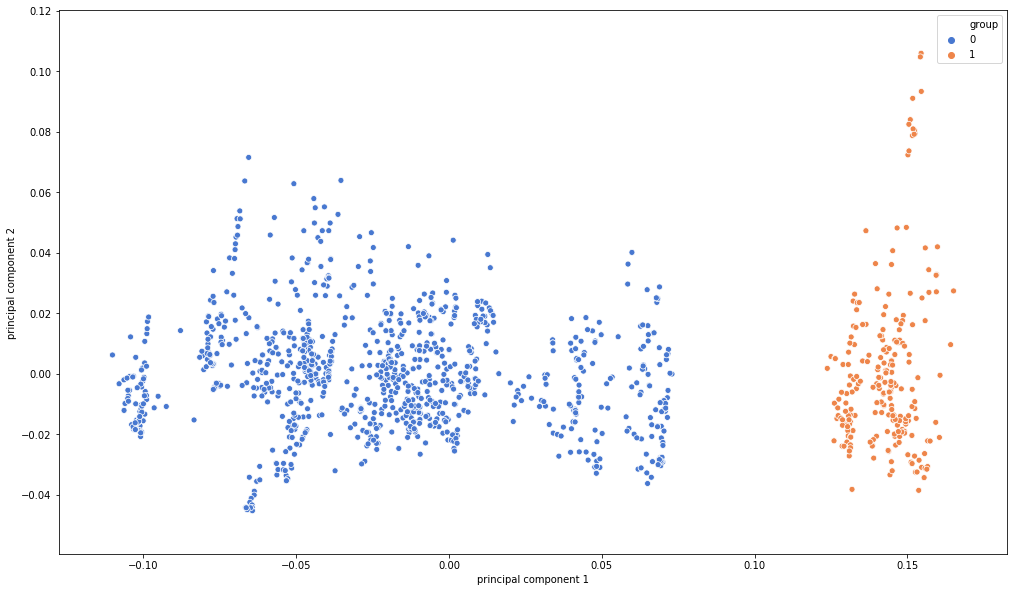

In [88]:
import seaborn
#"#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99","#b15928",
#flatui = ["#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99","#b15928","#9b59b6", "#3498db", "#95a5a6"]
#cmap=seaborn.set_palette(flatui,15)
cmap = seaborn.color_palette("muted", 2)
seaborn.scatterplot(x='principal component 1', y='principal component 2', hue='group', data=c,
                     palette=cmap,)